In [1]:
from pymongo import MongoClient
from collections import Counter
import pandas as pd
import seaborn as sns
import numpy as np

In [66]:
client = MongoClient()
db = client['youtube_database']
videos = db.videos
pd.options.display.max_rows = 999

In [3]:
records = videos.find({})
d = []
for cursor in records:
    new_record = dict(
        published_at = cursor['items'][0]['snippet']['publishedAt'],
        channel_id = cursor['items'][0]['snippet']['channelId'],
        title = cursor['items'][0]['snippet']['title'],
        title_length = len(cursor['items'][0]['snippet']['title']),
        description = cursor['items'][0]['snippet']['description'],
        description_length = len(cursor['items'][0]['snippet']['description']),
        description_word_count = Counter(cursor['items'][0]['snippet']['description'].replace('\n',' ').split(' ')),
        channel_title = cursor['items'][0]['snippet']['channelTitle'],
        tags = cursor['items'][0]['snippet'].get('tags',[]),
        tag_count = len(cursor['items'][0]['snippet'].get('tags',[])),
        category_id = cursor['items'][0]['snippet']['categoryId'],
        duration = cursor['items'][0]['contentDetails']['duration'],
        caption = cursor['items'][0]['contentDetails']['caption'],
        view_count = cursor['items'][0]['statistics'].get('viewCount', 0),
        like_count = cursor['items'][0]['statistics'].get('likeCount', 0),
        dislike_count = cursor['items'][0]['statistics'].get('dislikeCount', 0),
        favorite_count = cursor['items'][0]['statistics'].get('favoriteCount', 0),
        comment_count = cursor['items'][0]['statistics'].get('commentCount', 0),
        relevant_topic_ids = cursor['items'][0].get('topicDetails',{}).get('relevantTopicIds',[]),
        relevant_topic_ids_count = len(cursor['items'][0].get('topicDetails',{}).get('relevantTopicIds', [])),
        topic_categories = cursor['items'][0].get('topicDetails',{}).get('topicCategories', []),
        topic_category_count = len(cursor['items'][0].get('topicDetails',{}).get('topicCategories', [])),
    )
    d.append(new_record)
df = pd.DataFrame(d)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3446 entries, 0 to 3445
Data columns (total 23 columns):
caption                     3446 non-null object
category_id                 3446 non-null category
channel_id                  3446 non-null object
channel_title               3446 non-null object
comment_count               3446 non-null int64
description                 3446 non-null object
description_length          3446 non-null int64
description_word_count      3446 non-null object
dislike_count               3446 non-null object
duration                    3446 non-null object
favorite_count              3446 non-null object
like_count                  3446 non-null object
published_at                3446 non-null object
relevant_topic_ids          3446 non-null object
relevant_topic_ids_count    3446 non-null int64
tag_count                   3446 non-null int64
tags                        3446 non-null object
title                       3446 non-null object
title_length 

In [17]:
df['view_count'] = pd.to_numeric(df['view_count'])

In [8]:
df['seconds']=df['duration'].apply(lambda x: seconds_calc(x))

In [7]:
def seconds_calc(x):
    arr = x.replace('PT','').replace('S','').replace('H',' ').replace('M',' ').split()
    if len(arr) == 3:
        return int(arr[0])*60*60+int(arr[1])*60+int(arr[2])
    elif len(arr) == 2:
        return int(arr[0])*60+int(arr[1])
    else:
        return int(arr[0])


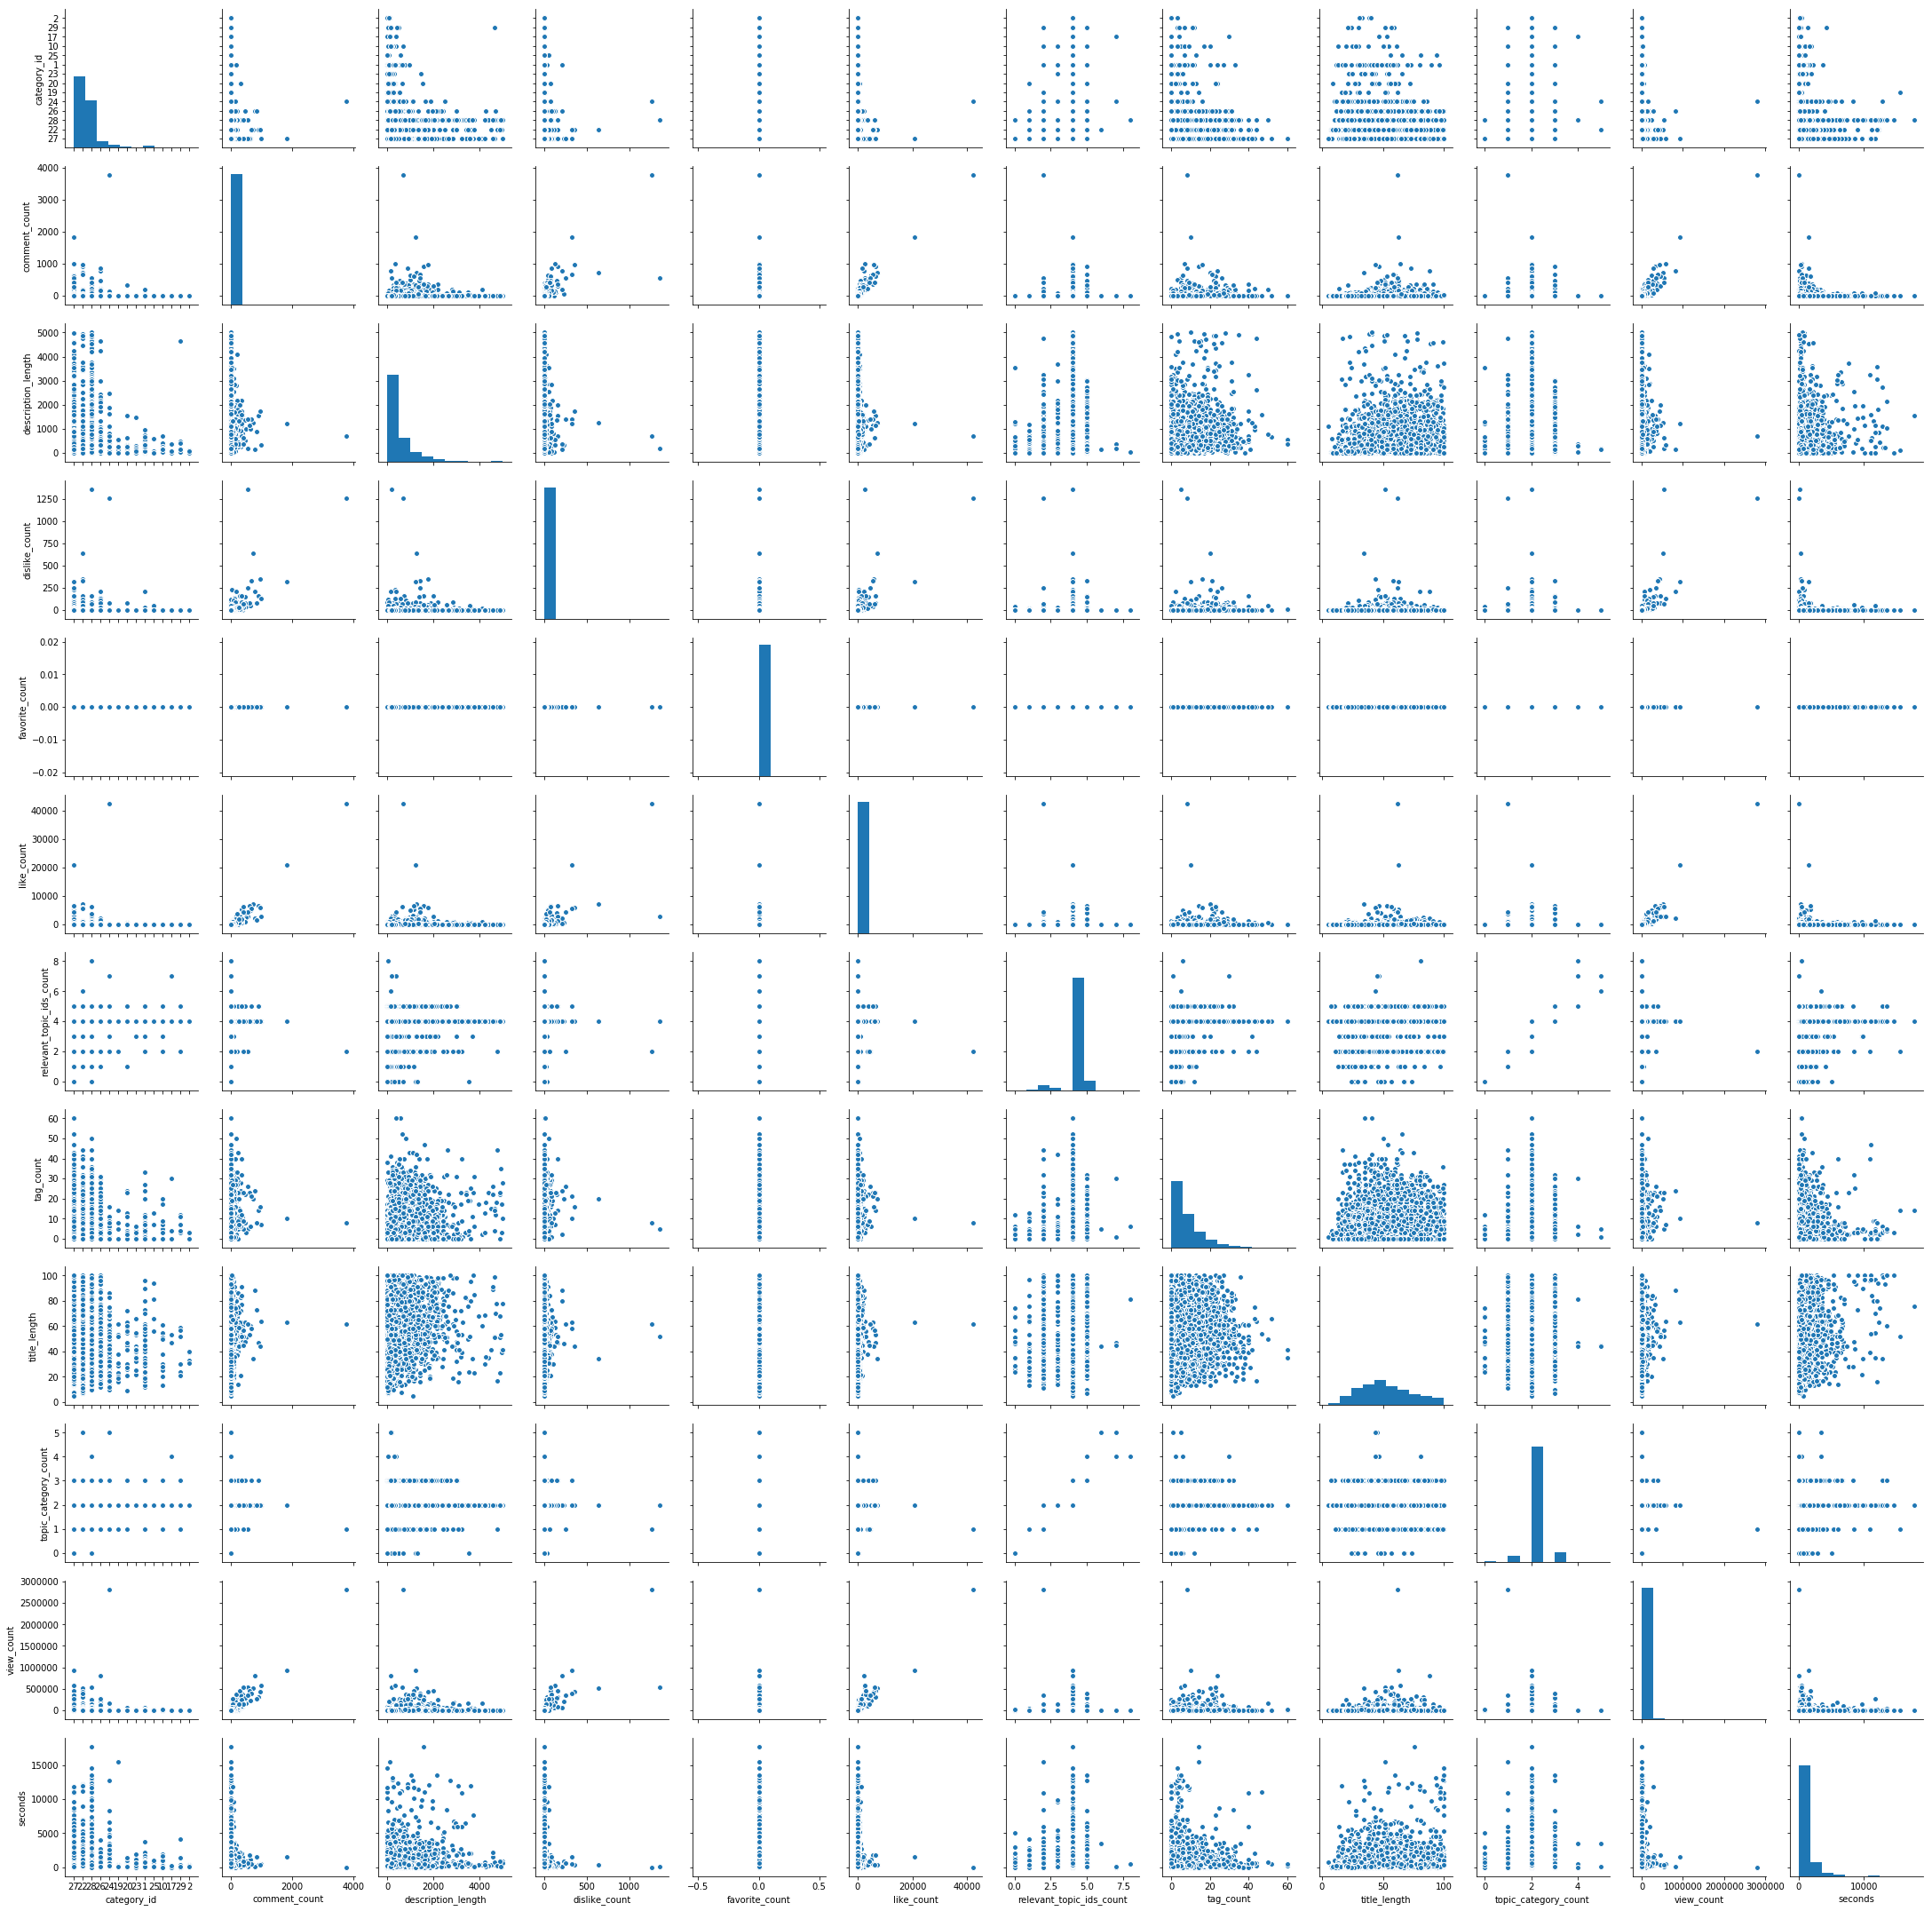

In [18]:
g = sns.pairplot(df)

In [19]:
g.savefig("output.png")

In [32]:
df['topic_categories'] = df['topic_categories'].apply(lambda x: tuple(x))

In [41]:
df.groupby('channel_id').sum()['view_count'].sort_values()

channel_id
UCBeklUg4nlAZ6CZVO5Y7Hxg          0
UCdpj3BdmGQOMIXWVbBVe82A          0
UCY_bQJMHghMzjGxbSUso7tw          0
UC3EcBUZfuUcWPheIk8SJndQ          0
UCdE2O5upv9zJ-OveLNGDTag          2
UC3DEuR0Ba4HPom_yecxyCSA          2
UC9AdeZlrjnaXepT-2xjkHVw          3
UC3k4RcfytVViTpYTU9HCTkw          3
UCUON4j9wT8b2RX4Tg4UfpoA          4
UCce9yymTmPRhVXeKBP8vZ6w          4
UCH5d_LqOBd5EuNyBnyT2clw          4
UC8KY7TkT6SllgAecA3JzdhQ          4
UCSfYZJf8nlU_yl3gOn5gW_Q          5
UCIlxOnpiQ0TOqN2iVgRSxng          5
UChk69vbMbxBPRutHpcDfe0Q          5
UCcRbiTIwTTCGVQ1l8z8uNqA          6
UCAGOJaTBINA5h4Pd82iAVqQ          6
UC1qkMXH8d2I9DDAtBSeEHqg          7
UCeGGsYV2icSslWYFNcgUhyg          7
UCq-yQKFNRGUHtZ60LmKh_hw          7
UCeG9lTCK7Nvkm_WPzN78Pdg          8
UC1nrlkYcj3hI8XnQgz8aK_g          8
UCfQOTikXz0NmA2IPw60TCJQ          8
UCAVg7ez3WUkCsF6g8euLyCA          9
UCLfNJEXU179cLuJUx4bVjWw         10
UClzYnxgQ9gV7GwT2XvUfR9Q         11
UCAyjehCt65BZ0UbnXRxeheQ         12
UCBwp9up9asJHXRPP

In [48]:
df['published_at_dt'] =pd.to_datetime(df['published_at'])

In [50]:
t = df['published_at_dt'][0]

In [53]:
df['published_at_date'] = df['published_at_dt'].apply(lambda x: x.dayofweek)

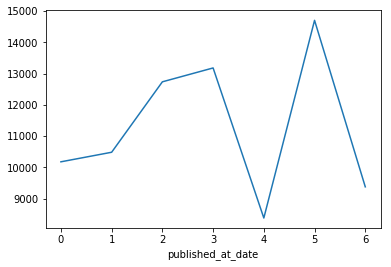

In [62]:
df.groupby('published_at_date').mean()['view_count'].plot()

In [71]:
df['published_at_hr'] = df['published_at_dt'].apply(lambda x: x.hour)

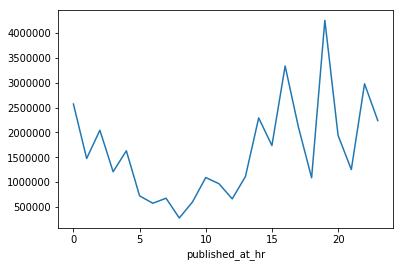

In [73]:
df.groupby('published_at_hr').sum()['view_count'].plot()